In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [5]:
df = pd.read_csv('/kaggle/input/customer-data/marketing_campaign.csv', sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.shape

(2240, 29)

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
df.describe(include= 'O')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [13]:
len(df.columns)

29

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for cols in df.columns:
    if df[cols].dtype == 'O':
        df[cols] = le.fit_transform(df[cols])

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(df) 

In [17]:
pca = PCA()
X_pac = pca.fit_transform(X_scaled)

In [21]:
explained_variance =pca.explained_variance_ratio_
explained_variance 

array([2.41416302e-01, 7.70334780e-02, 7.10052746e-02, 5.38526386e-02,
       4.36339216e-02, 3.97337014e-02, 3.81704607e-02, 3.71657074e-02,
       3.69184236e-02, 3.49851589e-02, 3.45790638e-02, 3.07242769e-02,
       2.76020448e-02, 2.55613262e-02, 2.35400338e-02, 2.25337270e-02,
       2.16713897e-02, 1.96740320e-02, 1.91481782e-02, 1.71806516e-02,
       1.59982286e-02, 1.50547817e-02, 1.39364287e-02, 1.15062102e-02,
       1.12316228e-02, 9.01959671e-03, 7.12334026e-03, 1.45392966e-33,
       1.45392966e-33])

In [30]:
print('Variance Explainned by Each Component')
for i, var in enumerate(explained_variance, i):
    print(f'PC{i}: {var:.2%}')

Variance Explainned by Each Component
PC29: 24.14%
PC30: 7.70%
PC31: 7.10%
PC32: 5.39%
PC33: 4.36%
PC34: 3.97%
PC35: 3.82%
PC36: 3.72%
PC37: 3.69%
PC38: 3.50%
PC39: 3.46%
PC40: 3.07%
PC41: 2.76%
PC42: 2.56%
PC43: 2.35%
PC44: 2.25%
PC45: 2.17%
PC46: 1.97%
PC47: 1.91%
PC48: 1.72%
PC49: 1.60%
PC50: 1.51%
PC51: 1.39%
PC52: 1.15%
PC53: 1.12%
PC54: 0.90%
PC55: 0.71%
PC56: 0.00%
PC57: 0.00%


In [32]:
loading = pd.DataFrame(pca.components_.T,
                      columns= [f'PC{i}' for i in range(1, len(df.columns)+1)],
                        index = df.columns)

In [33]:
print("\nTop contributing features per component:")
for pc in loadings.columns[:5]:  # first 5 PCs
    top_features = loadings[pc].abs().sort_values(ascending=False).head(5)
    print(f"\n{pc}:")
    print(top_features)


Top contributing features per component:

PC1:
NumCatalogPurchases    0.318678
MntMeatProducts        0.312347
MntWines               0.306915
Income                 0.291173
NumStorePurchases      0.282859
Name: PC1, dtype: float64

PC2:
Teenhome             0.518551
NumDealsPurchases    0.429662
Year_Birth           0.342971
NumWebPurchases      0.332287
Education            0.240371
Name: PC2, dtype: float64

PC3:
Response        0.425517
AcceptedCmp4    0.380132
AcceptedCmp2    0.377865
AcceptedCmp5    0.374105
AcceptedCmp1    0.329891
Name: PC3, dtype: float64

PC4:
NumDealsPurchases    0.385006
AcceptedCmp3         0.365484
NumWebVisitsMonth    0.328951
MntGoldProds         0.315398
Year_Birth           0.280526
Name: PC4, dtype: float64

PC5:
Recency         0.451253
Education       0.438333
AcceptedCmp3    0.353266
AcceptedCmp4    0.352489
Response        0.296057
Name: PC5, dtype: float64


In [34]:
# 5. If you want to select how many PCs to keep (e.g. 95% variance)
n_components = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
print(f"\nNumber of components to explain 95% variance: {n_components}")


Number of components to explain 95% variance: 23


In [37]:
explained_var = pca.explained_variance_ratio_
cum_var = np.cumsum(explained_var)
cum_var

array([0.2414163 , 0.31844978, 0.38945505, 0.44330769, 0.48694162,
       0.52667532, 0.56484578, 0.60201148, 0.63892991, 0.67391507,
       0.70849413, 0.73921841, 0.76682045, 0.79238178, 0.81592181,
       0.83845554, 0.86012693, 0.87980096, 0.89894914, 0.91612979,
       0.93212802, 0.9471828 , 0.96111923, 0.97262544, 0.98385706,
       0.99287666, 1.        , 1.        , 1.        ])

In [38]:
X_reduced = pca.transform(X_scaled)[:, :n_components]
X_reduced

array([[ 3.77017124, -0.32912467, -0.42106712, ..., -0.56520877,
         1.00572202,  0.77516532],
       [-2.36161756,  0.19369666, -0.21593476, ...,  0.01024461,
         0.2033392 , -0.05488977],
       [ 1.62164131, -0.15583896, -1.09095328, ...,  1.09481323,
        -0.26735353,  0.63651822],
       ...,
       [ 1.4440025 ,  0.11304055,  0.94903941, ...,  1.02028164,
        -0.78896181, -0.14677679],
       [ 1.7661673 ,  1.25185138, -1.2219068 , ...,  0.12617691,
        -0.31738134,  0.42099486],
       [-1.66005783,  1.22846584,  1.12695592, ...,  0.53371605,
        -0.41499471,  0.23975378]])

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

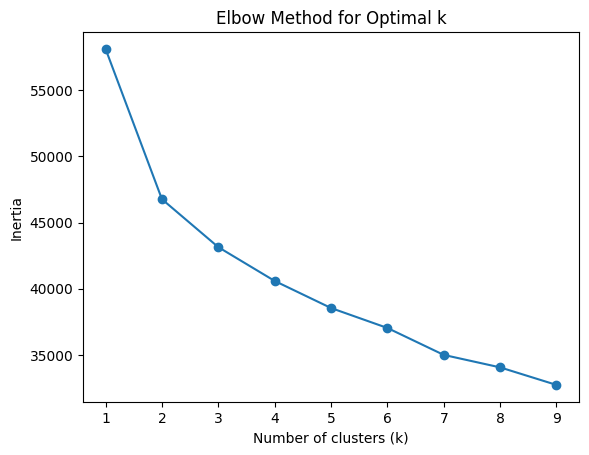

In [60]:
inertia = []
K_range = range(1,10)

for k in K_range:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(X_reduced)
    inertia.append(model.inertia_)

plt.plot(K_range,inertia,marker= 'o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [42]:
optimal = 4 

model = KMeans(n_clusters = 4, random_state = 42)
labels = model.fit_predict(X_reduced)

df['Cluster'] = labels

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [45]:
df['Cluster'].value_counts()

Cluster
0    1013
1     608
3     448
2     171
Name: count, dtype: int64

In [54]:
centroid = model.cluster_centers_

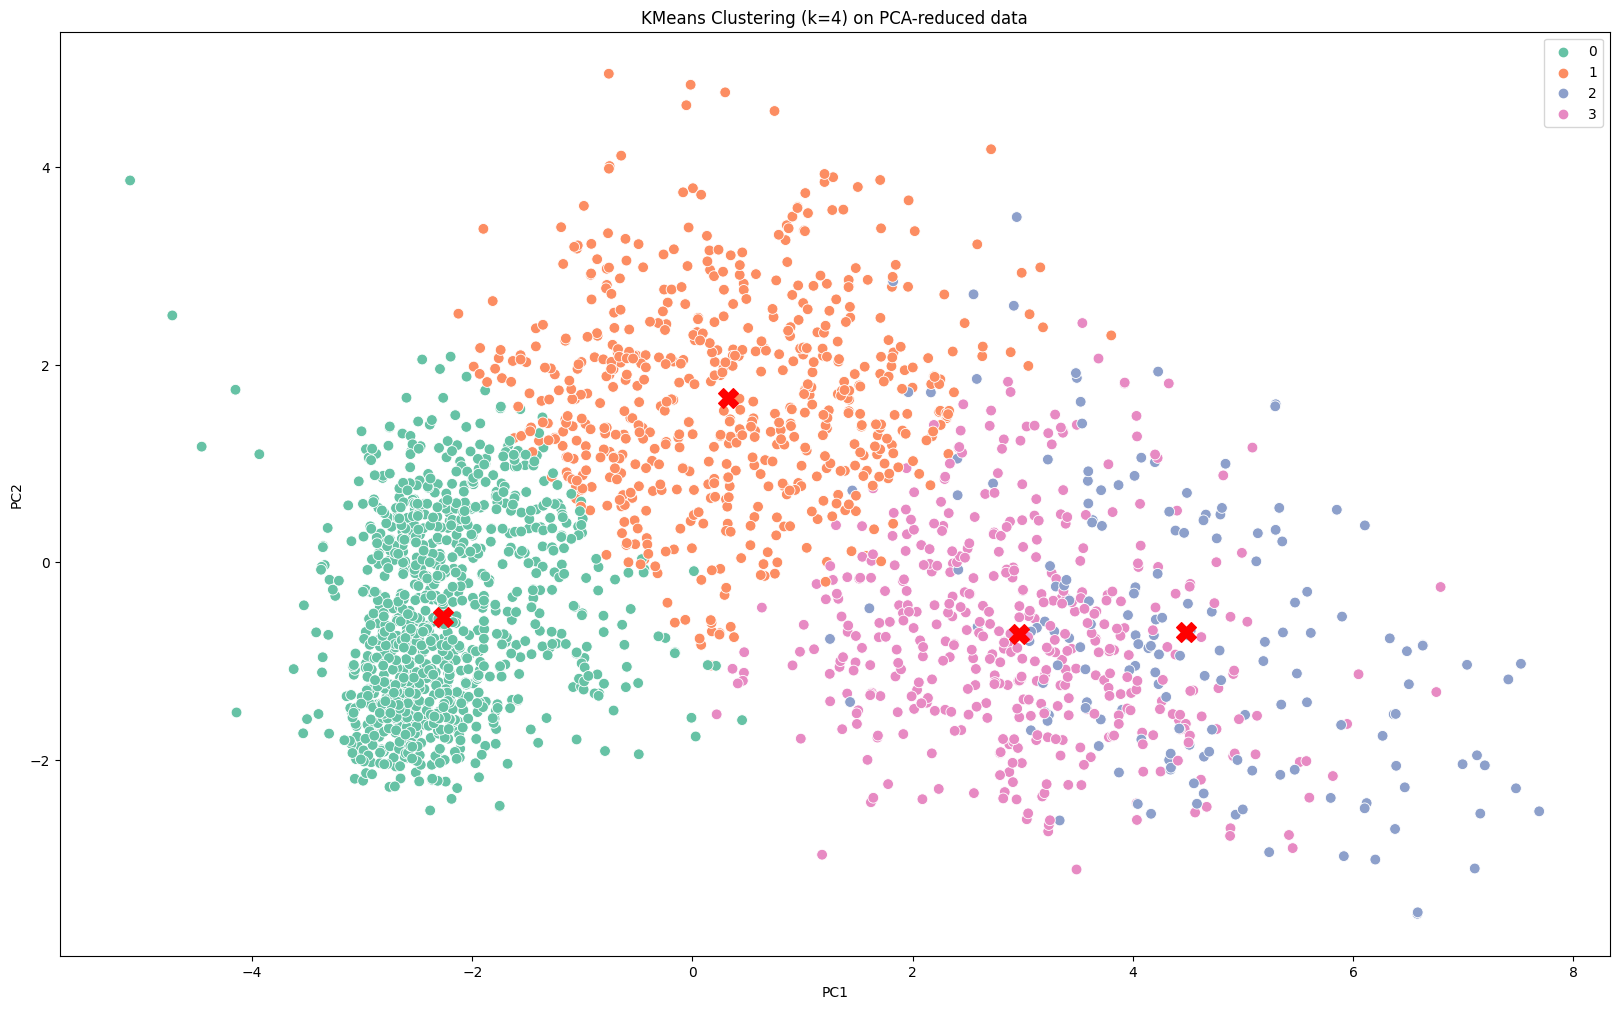

In [55]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=labels, palette="Set2", s=60)
plt.scatter(centroid[:,0], centroid[:,1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans Clustering (k={optimal}) on PCA-reduced data")
plt.show()

In [62]:

# Convert back to original feature space
centroids_original = pca.inverse_transform(centroid)



ValueError: shapes (4,23) and (29,29) not aligned: 23 (dim 1) != 29 (dim 0)

In [56]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Scale your reduced data (important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X_reduced)

# 2. Run DBSCAN (tune eps & min_samples)
dbscan = DBSCAN(eps=0.5, min_samples=5)  
labels = dbscan.fit_predict(X_scaled)

# 3. Check results
print("Cluster labels:", np.unique(labels))
# -1 means noise points


Cluster labels: [-1]


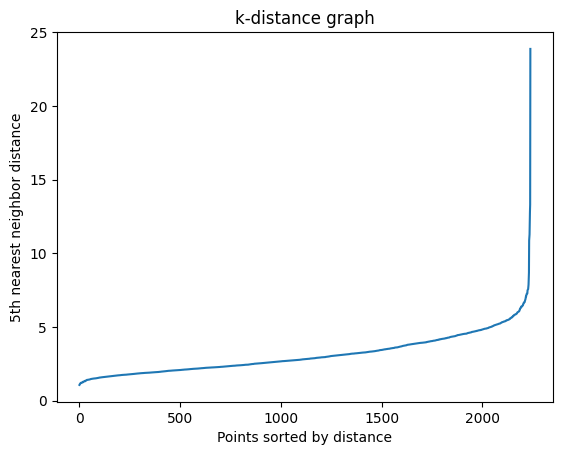

In [57]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

# Sort distances of k-th nearest neighbor
distances = np.sort(distances[:,4])  # 4 = n_neighbors-1
plt.plot(distances)
plt.title("k-distance graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("5th nearest neighbor distance")
plt.show()


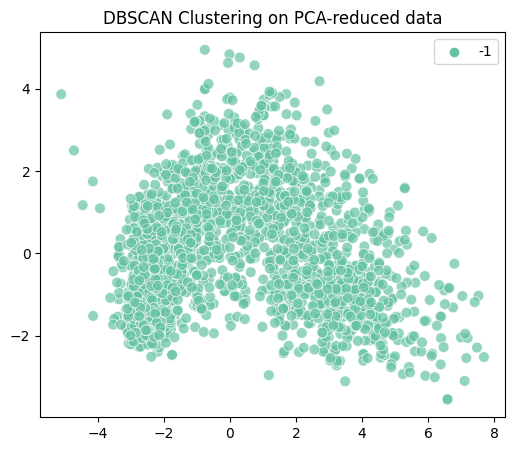

In [58]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], hue=labels, palette="Set2", s=60, alpha=0.7)
plt.title("DBSCAN Clustering on PCA-reduced data")
plt.show()
